********** import libraray **********

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import f_classif
from imblearn.over_sampling import SMOTE
import seaborn as sns

********** Import the DataSet **********

In [156]:
def read_data():
    return pd.read_csv("data_breast_cancer.csv" )
main_data=read_data()
main_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


********** Data Preparation **********

In [157]:
main_data.info()
# target = diagnosis    M = malignant=بدخیم       B = benign=خوش خیم

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

##  Handle Duplicate Data

In [158]:
"""
براساس ای دی، دیتای تکراری وجود ندارد
"""
main_data.duplicated().sum()

0

NO need to integerate columns

No need to Handle Categorical Data - dataset just has target column as Categorical 

## Handle Missing Values

In [159]:
# Handle Missing Values
null_value=main_data.isnull().sum() 
null_value[null_value !=0]

Series([], dtype: int64)

## Splitting the Dataset into the Training set, Test set, and Validation set 

In [160]:
"""
this data is supervised with discrete target . split to 70% train and 30% test
"""
def split_data():
    X = main_data.iloc[:, 2:-1]
    target = main_data.iloc[:,[1]]
    X_train, X_test, Y_train, Y_test = train_test_split(X,target, test_size = 0.3,random_state = 0)

    train_data = pd.concat([X_train, Y_train], axis = 1).reset_index().drop("index", axis = 1)
    test_data = pd.concat([X_test, Y_test], axis = 1).reset_index().drop("index", axis = 1)
    return train_data ,test_data ,X_train ,Y_train,X_test
train_data, test_data, X_train , Y_train ,X_test=split_data()
test_data

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,diagnosis
0,13.400,20.52,88.64,556.7,0.11060,0.14690,0.14450,0.08172,0.2116,0.07325,...,16.410,29.66,113.30,844.4,0.15740,0.38560,0.51060,0.20510,0.3585,M
1,13.210,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,0.05584,...,14.350,34.23,91.29,632.9,0.12890,0.10630,0.13900,0.06005,0.2444,B
2,14.020,15.66,89.59,606.5,0.07966,0.05581,0.02087,0.02652,0.1589,0.05586,...,14.910,19.31,96.53,688.9,0.10340,0.10170,0.06260,0.08216,0.2136,B
3,14.260,18.17,91.22,633.1,0.06576,0.05220,0.02475,0.01374,0.1635,0.05586,...,16.220,25.26,105.80,819.7,0.09445,0.21670,0.15650,0.07530,0.2636,B
4,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,0.05863,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,13.710,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,M
167,17.990,20.66,117.80,991.7,0.10360,0.13040,0.12010,0.08824,0.1992,0.06069,...,21.080,25.41,138.10,1349.0,0.14820,0.37350,0.33010,0.19740,0.3060,M
168,13.710,18.68,88.73,571.0,0.09916,0.10700,0.05385,0.03783,0.1714,0.06843,...,15.110,25.63,99.43,701.9,0.14250,0.25660,0.19350,0.12840,0.2849,B
169,13.300,21.57,85.24,546.1,0.08582,0.06373,0.03344,0.02424,0.1815,0.05696,...,14.200,29.20,92.94,621.2,0.11400,0.16670,0.12120,0.05614,0.2637,B


## split validation data

In [161]:
print(train_data.shape[0], test_data.shape[0])

398 171


In [162]:
def validation():
    
    valid_from_train = train_data.sample(n = 40)
    valid_from_test = test_data.sample(n = 17)
    valid_data = pd.concat([valid_from_train, valid_from_test], axis = 0).reset_index().drop("index", axis = 1)
    
    return valid_from_train , valid_from_test , valid_data

valid_from_train , valid_from_test , valid_data = validation()

In [163]:
def new_data():

    new_train_data = train_data.drop(valid_from_train.index.to_list() , axis = 0)
    new_test_data = test_data.drop(valid_from_test.index.to_list() , axis = 0)

    return new_train_data, new_test_data

new_train_data, new_test_data = new_data()

## Handle Outlier Data 

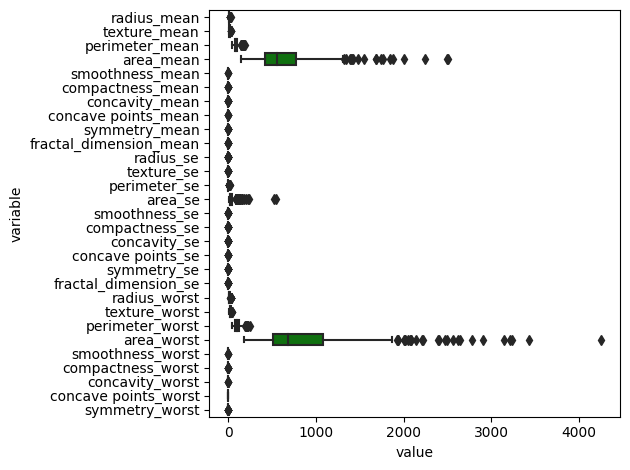

In [164]:
#find incorrect data
def show_outlier():
    df_melt=new_train_data.melt(id_vars=['diagnosis'])
    sns.boxplot(data=df_melt, x="value", y="variable", orient="h", palette=["m", "g"])
    plt.tight_layout()
    return plt.show()

show_outlier()

In [165]:
def incorrect_area_mean():
    Q1 = np.percentile(new_train_data['area_mean'], 25, method='midpoint')
    Q3 = np.percentile(new_train_data['area_mean'],75, method='midpoint')
    IQR = Q3 - Q1
    
    upper = Q3+1.5*IQR
    upper_array = np.array(new_train_data['area_mean'] >= upper)
    
    lower = Q1-1.5*IQR
    lower_array = np.array(new_train_data['area_mean'] <= lower)
    return "IQR:",IQR,"UB:", upper, upper_array.sum(), "LB:", lower, lower_array.sum()
incorrect_area_mean()

('IQR:', 355.55, 'UB:', 1310.575, 19, 'LB:', -111.62500000000006, 0)

In [166]:
def incorrect_area_worst():
    Q1 = np.percentile(new_train_data['area_worst'], 25, method='midpoint')
    Q3 = np.percentile(new_train_data['area_worst'],75, method='midpoint')
    IQR = Q3 - Q1
  
    upper = Q3+1.5*IQR
    upper_array = np.array(new_train_data['area_worst'] >= upper)
    
    lower = Q1-1.5*IQR
    lower_array = np.array(new_train_data['area_worst'] <= lower)
    return "IQR:",IQR, "UB:", upper,upper_array.sum(),"LB:", lower,lower_array.sum()
incorrect_area_worst()

('IQR:', 550.45, 'UB:', 1891.6750000000002, 27, 'LB:', -310.1250000000001, 0)

## Feature Selection 

(                        radius_mean  texture_mean  perimeter_mean  area_mean  \
 radius_mean                1.000000           NaN        0.998192   0.986171   
 texture_mean                    NaN      1.000000             NaN        NaN   
 perimeter_mean             0.998192           NaN        1.000000   0.985723   
 area_mean                  0.986171           NaN        0.985723   1.000000   
 smoothness_mean                 NaN           NaN             NaN        NaN   
 compactness_mean                NaN           NaN             NaN        NaN   
 concavity_mean                  NaN           NaN             NaN        NaN   
 concave points_mean        0.826897           NaN        0.853238   0.824559   
 symmetry_mean                   NaN           NaN             NaN        NaN   
 fractal_dimension_mean          NaN           NaN             NaN        NaN   
 radius_se                       NaN           NaN             NaN        NaN   
 texture_se                 

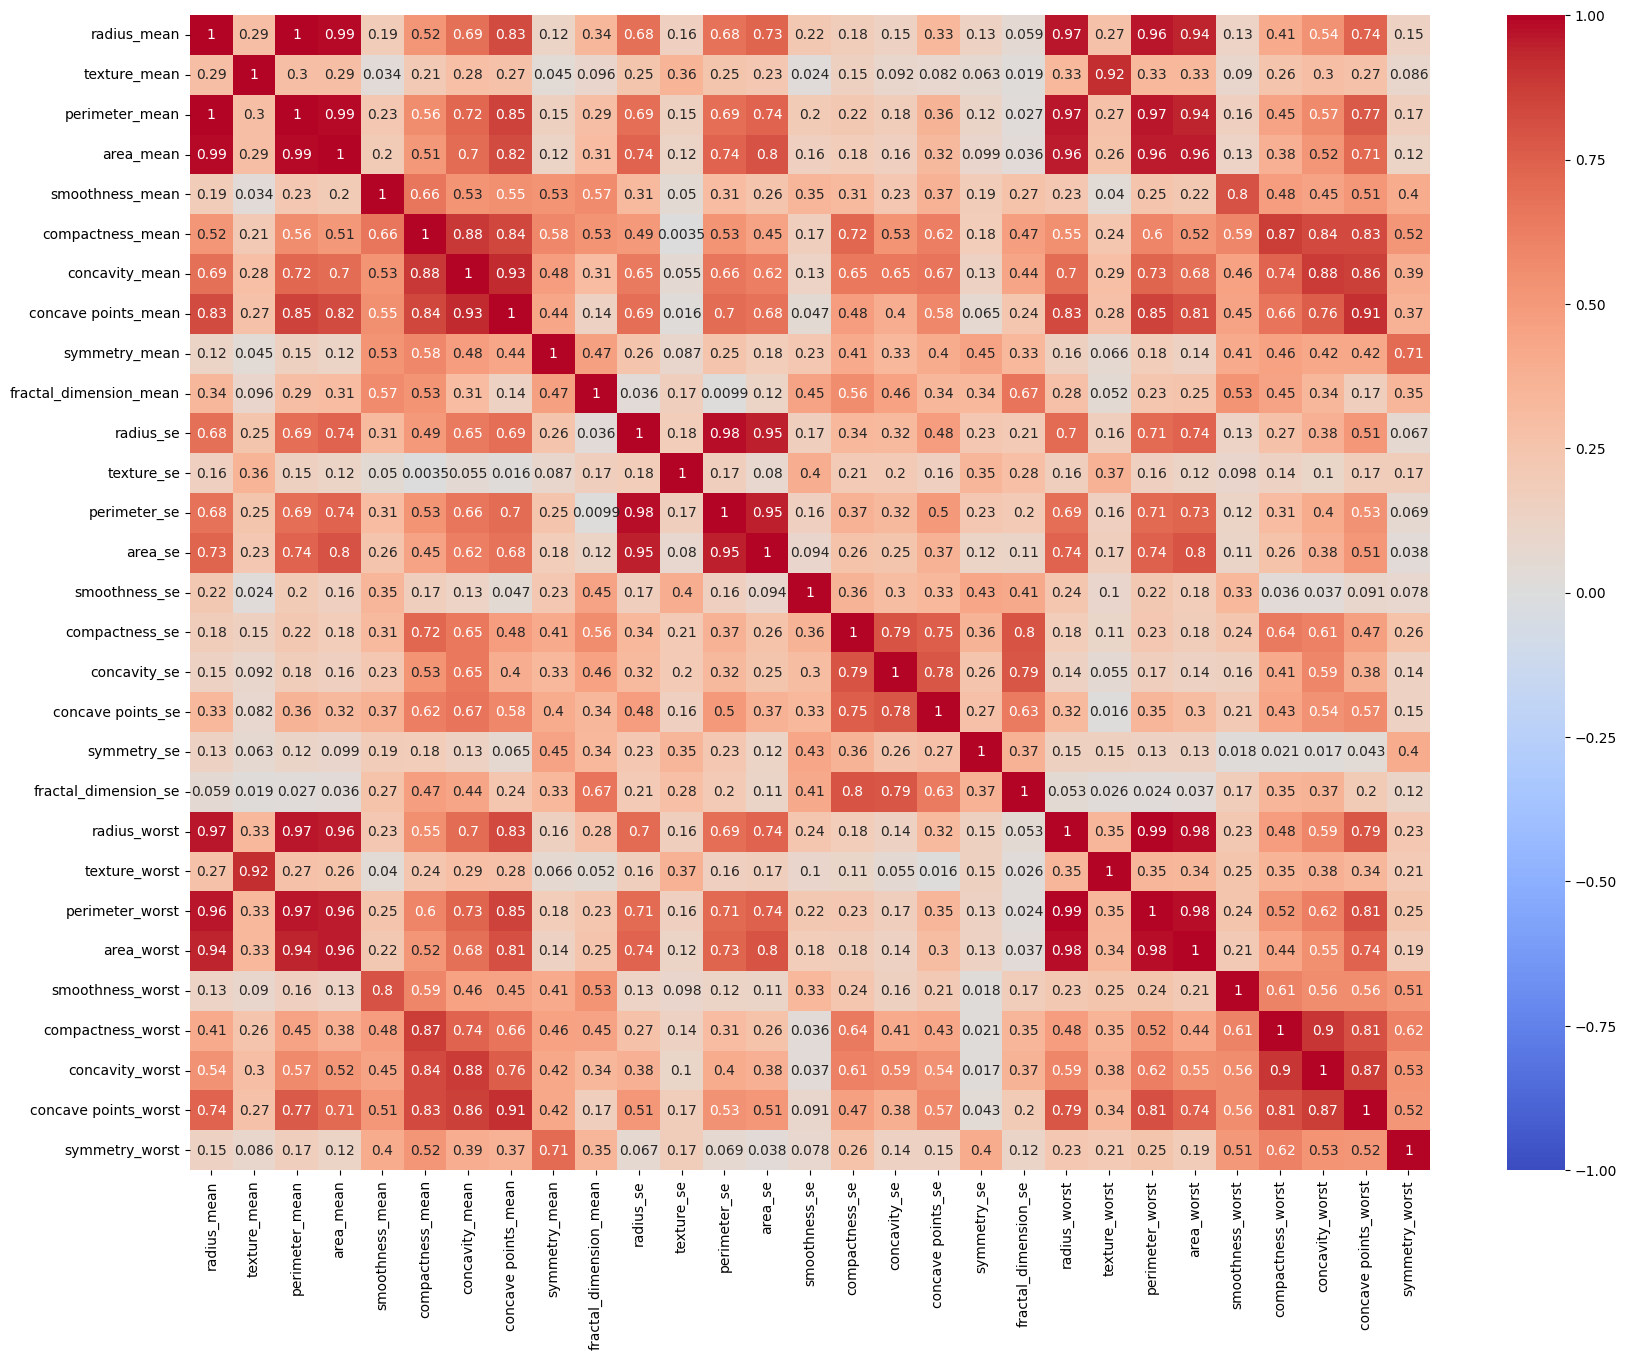

In [167]:
def corr():

    corr_matrix = new_train_data.iloc[:,:-1].corr().abs()
    worth_corr=corr_matrix[corr_matrix >0.8]
    fig, ax = plt.subplots(figsize=(20, 15))
    heatmap=sns.heatmap(corr_matrix, vmin = -1, vmax = +1, cmap = "coolwarm", annot = True)
    return worth_corr,heatmap
corr()

In [168]:
# ANOVA feature selection for numeric input and categorical output

new_X_train= new_train_data.iloc[:,:-1]
new_Y_train = new_train_data.iloc[:,-1:]
new_X_test=new_test_data.iloc[:,:-1]

def feature_selection():

    fs = SelectKBest(score_func=f_classif, k='all')

    fs.fit(new_X_train,np.ravel(new_Y_train) )
    X_train_fs = fs.transform(new_X_train)
    X_test_fs = fs.transform(new_X_test)
    return X_train_fs, X_test_fs ,fs
   
X_train_fs, X_test_fs ,fs=feature_selection()
X_train_fs

array([[1.149e+01, 1.459e+01, 7.399e+01, ..., 2.596e-01, 7.431e-02,
        2.941e-01],
       [1.049e+01, 1.861e+01, 6.686e+01, ..., 8.423e-02, 6.528e-02,
        2.213e-01],
       [1.225e+01, 1.794e+01, 7.827e+01, ..., 1.943e-01, 8.211e-02,
        3.113e-01],
       ...,
       [9.436e+00, 1.832e+01, 5.982e+01, ..., 1.144e-01, 5.052e-02,
        2.454e-01],
       [9.720e+00, 1.822e+01, 6.073e+01, ..., 0.000e+00, 0.000e+00,
        1.909e-01],
       [1.151e+01, 2.393e+01, 7.452e+01, ..., 3.630e-01, 9.653e-02,
        2.112e-01]])

Feature 0: 373.618447
Feature 1: 61.903367
Feature 2: 402.110331
Feature 3: 320.337822
Feature 4: 58.965462
Feature 5: 223.298206
Feature 6: 348.338585
Feature 7: 533.280648
Feature 8: 44.755910
Feature 9: 0.149453
Feature 10: 152.476633
Feature 11: 1.033198
Feature 12: 144.149658
Feature 13: 129.350512
Feature 14: 3.015574
Feature 15: 27.069185
Feature 16: 15.991209
Feature 17: 57.719252
Feature 18: 0.117121
Feature 19: 0.566978
Feature 20: 494.802850
Feature 21: 84.895014
Feature 22: 513.961962
Feature 23: 368.056291
Feature 24: 81.483433
Feature 25: 213.924475
Feature 26: 329.716355
Feature 27: 652.165649
Feature 28: 82.905288


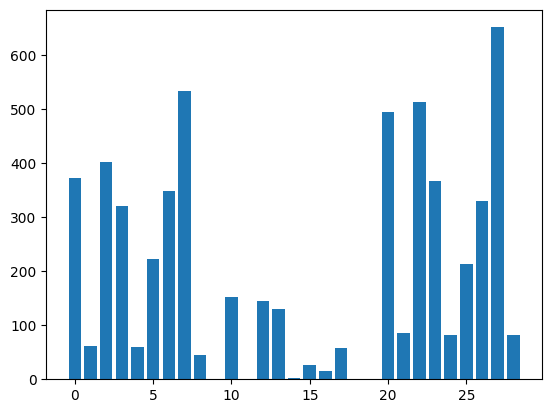

In [169]:
def fs_plot():
# what are scores for the features
    for i in range(len(fs.scores_)):
        print('Feature %d: %f' % (i, fs.scores_[i]))
        
    # plot the scores
    plt.bar([i for i in range(len(fs.scores_))], fs.scores_)

    plt.show()
fs_plot()

In [170]:
def remove_featuresf_from_test_train():

    train_data_fs = new_train_data.drop (["texture_mean","fractal_dimension_mean","texture_se","smoothness_se","symmetry_se","fractal_dimension_se"], axis=1)
    test_data_fs = new_test_data.drop (["texture_mean","fractal_dimension_mean","texture_se","smoothness_se","symmetry_se","fractal_dimension_se"], axis=1)
    valid_data_fs = valid_data.drop (["texture_mean","fractal_dimension_mean","texture_se","smoothness_se","symmetry_se","fractal_dimension_se"], axis=1)
    return  train_data_fs , test_data_fs , valid_data_fs

train_data_fs ,test_data_fs , valid_data_fs = remove_featuresf_from_test_train()

#The number of incorrect data in each column is less than 50%, and the number of features that have incorrect data is less than 50% of the total features, so there is no need to delete rows or columns.

## Handle Imbalanced Data

In [171]:
train_data_fs.iloc[:,-1].value_counts()

diagnosis
B    223
M    135
Name: count, dtype: int64

In [172]:
def smote_model():
    
    smote = SMOTE()

    x_smote, y_smote = smote.fit_resample(train_data_fs.iloc[:,:-1], train_data_fs.iloc[:,[-1]])
    x_smote_df = pd.DataFrame(x_smote, columns = train_data_fs.iloc[:,:-1].columns)
    y_smote_df = pd.DataFrame(y_smote)

    train_smote = pd.concat([x_smote_df,y_smote_df], axis = 1)
    value_smote=train_smote.iloc[:,[-1]].value_counts()
    duplicate_data=train_smote.duplicated().sum()

    return value_smote , duplicate_data , x_smote_df,y_smote_df, train_smote
value_smote , duplicate_data , x_smote_df, y_smote_df, train_smote = smote_model()
value_smote ,duplicate_data

(diagnosis
 B            223
 M            223
 Name: count, dtype: int64,
 0)

## Feature Scaling 

In [173]:
# X_train scale

def x_train_scale():
    mm = MinMaxScaler()
    mm_x_smote = mm.fit_transform(x_smote_df)
    mm_x_smote_df = pd.DataFrame(mm_x_smote, columns = x_smote_df.columns)
    mm_train=pd.concat([mm_x_smote_df, y_smote_df], axis = 1)

    return mm_x_smote_df , mm_train
   
mm_x_smote_df ,mm_train = x_train_scale()
mm_train

,radius_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,perimeter_se,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,diagnosis
0,0.213403,0.208693,0.110880,0.564462,0.215396,0.124367,0.097863,0.363131,0.033279,0.038166,...,0.159018,0.263326,0.157528,0.069406,0.422836,0.168534,0.234932,0.255977,0.271240,B
1,0.166075,0.159422,0.080933,0.588357,0.162318,0.053819,0.088469,0.213131,0.013399,0.013099,...,0.111348,0.333689,0.101350,0.046746,0.463118,0.074813,0.076226,0.224871,0.127735,B
2,0.249373,0.238270,0.134380,0.368307,0.162352,0.091026,0.115855,0.459596,0.039290,0.034255,...,0.201352,0.351812,0.180238,0.093148,0.333686,0.146996,0.175837,0.282845,0.305145,B
3,0.536182,0.516965,0.380700,0.361138,0.223615,0.191401,0.288966,0.283333,0.052942,0.049946,...,0.475987,0.382196,0.442203,0.301022,0.344912,0.210738,0.320181,0.541164,0.323477,M
4,0.000000,0.000000,0.000000,0.699142,0.192795,0.000000,0.000000,0.439394,0.040775,0.037506,...,0.000000,0.200426,0.000000,0.000000,0.576042,0.090142,0.000000,0.000000,0.269466,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,0.336974,0.340756,0.202378,0.632219,0.413252,0.255096,0.289870,0.527537,0.195914,0.162195,...,0.278730,0.508037,0.264348,0.142888,0.579103,0.277870,0.237717,0.422116,0.312465,M
442,0.336094,0.336492,0.196395,0.549807,0.385713,0.292066,0.292902,0.478986,0.041910,0.054441,...,0.269319,0.503471,0.268618,0.135932,0.465508,0.311379,0.399820,0.515211,0.307433,M
443,0.312969,0.305472,0.181765,0.403364,0.239146,0.119683,0.165423,0.339345,0.052206,0.046148,...,0.294319,0.379003,0.276014,0.150699,0.341853,0.233840,0.215507,0.422916,0.247596,M
444,0.635190,0.640386,0.480795,0.659426,0.561980,0.567819,0.720840,0.696292,0.179817,0.163014,...,0.607439,0.478641,0.585067,0.421441,0.518230,0.370515,0.459308,0.870356,0.642889,M


In [174]:
# X_test scale

def x_test_scale():
    
    mm = MinMaxScaler()
    mm_x_test = mm.fit_transform(test_data_fs.iloc[:,:-1])
    mm_x_test_df = pd.DataFrame(mm_x_test, columns = test_data_fs.iloc[:,:-1].columns)
    Y_test_data = test_data_fs.iloc[:,[-1]].reset_index().drop("index", axis = 1)
    mm_test= pd.concat([mm_x_test_df, Y_test_data], axis = 1)

    return mm_test,mm_x_test_df 

   
mm_test,mm_x_test_df  = x_test_scale()
mm_test

,radius_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,perimeter_se,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,diagnosis
0,0.346610,0.362806,0.241673,0.459238,0.464653,0.338884,0.448272,0.674797,0.219975,0.225429,...,0.337748,0.530266,0.374749,0.222888,0.690887,0.382213,0.407827,0.704811,0.556273,M
1,0.333955,0.318204,0.228867,0.226854,0.074356,0.065009,0.113439,0.307465,0.074865,0.052687,...,0.244307,0.671402,0.227565,0.144607,0.422298,0.066826,0.111022,0.206357,0.236037,B
2,0.387905,0.372139,0.275594,0.142360,0.089828,0.048945,0.145474,0.285292,0.079484,0.081040,...,0.269709,0.210624,0.262605,0.165334,0.181981,0.061632,0.050000,0.282337,0.149593,B
3,0.403890,0.388152,0.293713,0.000000,0.074973,0.058044,0.075370,0.319290,0.092068,0.086381,...,0.329130,0.394379,0.324595,0.213746,0.097635,0.191490,0.125000,0.258763,0.289924,B
4,0.209405,0.206798,0.128942,0.400860,0.209900,0.100891,0.142293,0.535107,0.102421,0.069874,...,0.159031,0.325510,0.146382,0.087497,0.605127,0.124529,0.129712,0.293540,0.408925,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,0.367257,0.378131,0.256113,0.544244,0.537075,0.219653,0.328305,0.733925,0.373606,0.299516,...,0.367232,0.483323,0.356694,0.242357,0.766280,0.362565,0.213898,0.534708,0.447095,M
150,0.652324,0.649278,0.537974,0.387546,0.396757,0.281660,0.484037,0.583149,0.270229,0.222321,...,0.549578,0.399012,0.540591,0.409653,0.604184,0.368549,0.263658,0.678351,0.408925,M
151,0.367257,0.363690,0.251413,0.342073,0.300469,0.126290,0.207515,0.377679,0.163030,0.146874,...,0.278781,0.405806,0.281998,0.170146,0.550466,0.236546,0.154553,0.441237,0.349705,B
152,0.339949,0.329404,0.234453,0.205449,0.122418,0.078424,0.132968,0.452328,0.117633,0.122017,...,0.237503,0.516059,0.238598,0.140277,0.281877,0.135030,0.096805,0.192921,0.290205,B


In [175]:
# X_valid scale

def valid_scale():
    mm = MinMaxScaler()
    mm_x_valid = mm.fit_transform(valid_data_fs.iloc[:,:-1])
    mm_x_valid_df = pd.DataFrame(mm_x_valid, columns = valid_data_fs.iloc[:,:-1].columns)
    mm_valid = pd.concat([mm_x_valid_df, valid_data_fs.iloc[:,[-1]]], axis = 1)
    return mm_valid ,mm_x_valid_df 
   
mm_valid , mm_x_valid_df  = valid_scale()
mm_valid

,radius_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,perimeter_se,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,diagnosis
0,0.496819,0.484313,0.378502,0.559965,0.275037,0.390517,0.499198,0.423418,0.354675,0.281102,...,0.612585,0.500484,0.565217,0.522440,0.688240,0.338840,0.480360,0.553970,0.288214,M
1,0.162008,0.167147,0.096534,0.515387,0.238643,0.179169,0.244753,0.312241,0.239581,0.087368,...,0.132527,0.239845,0.119836,0.081933,0.546172,0.332877,0.240497,0.356531,0.225595,B
2,0.401709,0.388929,0.279312,0.513949,0.245792,0.299947,0.398951,0.268480,0.080976,0.088015,...,0.479035,0.732592,0.473421,0.357480,0.754341,0.544729,0.515585,0.668496,0.381734,M
3,0.496819,0.503246,0.366817,0.690825,0.485280,0.540757,0.525926,0.350089,0.202224,0.260783,...,0.483246,1.000000,0.505132,0.380552,0.871744,0.790077,0.748986,0.791438,0.336341,M
4,0.330377,0.312748,0.219360,0.303422,0.133782,0.047869,0.129012,0.382022,0.238285,0.216782,...,0.323227,0.422147,0.316866,0.218009,0.360695,0.208713,0.090307,0.233589,0.418376,B
5,0.338089,0.325460,0.222746,0.350302,0.201436,0.099574,0.129506,0.258427,0.038437,0.000000,...,0.279312,0.060928,0.252107,0.188723,0.289661,0.265358,0.183730,0.214050,0.177468,B
6,0.305957,0.281374,0.201036,0.213546,0.002210,0.011915,0.039648,0.000000,0.027856,0.016190,...,0.256452,0.196325,0.227906,0.170426,0.252170,0.005857,0.024557,0.101866,0.036642,B
7,0.314311,0.294266,0.208538,0.223900,0.054072,0.079009,0.140247,0.345358,0.025265,0.025119,...,0.316610,0.314313,0.287491,0.221807,0.371547,0.185037,0.239103,0.360446,0.406617,B
8,0.176788,0.168951,0.105497,0.528329,0.071651,0.128689,0.189506,0.308693,0.244116,0.206429,...,0.144559,0.667795,0.137779,0.089068,0.657656,0.098928,0.149645,0.246469,0.300793,B
9,0.440267,0.417508,0.318683,0.403509,0.167414,0.219020,0.268457,0.309876,0.292269,0.212124,...,0.462191,0.076886,0.428357,0.353280,0.369574,0.257116,0.315763,0.336114,0.230517,B


## Algorithms

In [176]:
from sklearn.metrics import classification_report ,confusion_matrix
from sklearn.metrics import accuracy_score

## K-Nearest Neighbor (KNN)

In [177]:
from sklearn.neighbors import KNeighborsClassifier

def knn():
    KNN_model = KNeighborsClassifier(n_neighbors = 5, metric = "minkowski", p = 2)
    KNN_model.fit(mm_train.iloc[:,:-1], np.ravel(mm_train.iloc[:,-1:]))
    
    y_knn_pred = KNN_model.predict(mm_test.iloc[:,:-1])
    y_knn_valid = KNN_model.predict(mm_valid.iloc[:,:-1])
    return y_knn_pred , y_knn_valid

y_knn_pred , y_knn_valid=knn()

## Evaluation of KNN

In [178]:
def knn_evaluation():
    cm=np.array(confusion_matrix(y_knn_pred, mm_test.iloc[:,[-1]] ))

    confusion = pd.DataFrame(cm, index=["is_canacer","is_healthy"],columns=["predicted_cancer","predicted _healthy"])
    
    cr = classification_report(y_knn_pred,mm_test.iloc[:,[-1]] )
    ac_valid=accuracy_score(y_knn_valid, mm_valid.iloc[:,[-1]])
    
   
    return confusion,ac_valid,print(cr) 
cr,ac_valid,confusion=knn_evaluation()
cr,ac_valid, confusion

              precision    recall  f1-score   support

           B       0.82      1.00      0.90        79
           M       1.00      0.77      0.87        75

    accuracy                           0.89       154
   macro avg       0.91      0.89      0.89       154
weighted avg       0.91      0.89      0.89       154



(            predicted_cancer  predicted _healthy
 is_canacer                79                   0
 is_healthy                17                  58,
 0.8070175438596491,
 None)

## C-Support Vector Classification (SVC)

In [179]:

#Grid Search hyperparameters for Support Vector Classifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold

def svm():
    model = SVC()
    parameters = {'kernel':('linear', 'rbf'), 'C':[1, 11], "gamma":("auto", "scale")}
    cv = RepeatedKFold(n_splits = 10, n_repeats = 3)
    clf = GridSearchCV(model, parameters , cv=cv)
    cv_results_=clf.fit(mm_train.iloc[:,:-1], np.ravel(mm_train.iloc[:,[-1]]))

    sorted(clf.cv_results_.keys())

    # Training Model
    SVC_model = SVC(kernel = cv_results_.best_params_['kernel'],
                    C = cv_results_.best_params_['C'],
                    gamma = cv_results_.best_params_['gamma'])
    svc_fit=SVC_model.fit(mm_train.iloc[:,:-1], np.ravel(mm_train.iloc[:,[-1]]))

    # Predict Validation and test data
    y_svc_pred = svc_fit.predict(mm_test.iloc[:,:-1])
    y_svc_valid = svc_fit.predict(mm_valid.iloc[:,:-1])


    return  y_svc_pred,  y_svc_valid
y_svc_pred,  y_svc_valid=svm()

In [180]:
#svm_evaluation
def svm_evaluation():
    cm=np.array(confusion_matrix(y_svc_pred, mm_test.iloc[:,[-1]] ))

    confusion = pd.DataFrame(cm, index=["is_canacer","is_healthy"],columns=["predicted_cancer","predicted _healthy"])
    
    cr = classification_report(y_svc_pred,mm_test.iloc[:,[-1]] )
    ac_valid=accuracy_score(y_svc_valid, mm_valid.iloc[:,[-1]])
    
   
    return confusion,ac_valid,print(cr) 
cr,ac_valid,confusion=svm_evaluation()
cr,ac_valid, confusion

              precision    recall  f1-score   support

           B       0.67      1.00      0.80        64
           M       1.00      0.64      0.78        90

    accuracy                           0.79       154
   macro avg       0.83      0.82      0.79       154
weighted avg       0.86      0.79      0.79       154



(            predicted_cancer  predicted _healthy
 is_canacer                64                   0
 is_healthy                32                  58,
 0.6666666666666666,
 None)

## Decision Tree

In [181]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#Hyperparameters Tuning
max_depth = []
acc_gini = []
acc_entropy = []

for i in range(1,25):
  dtree = DecisionTreeClassifier(criterion = "gini", max_depth = i)
  dtree.fit(train_smote.iloc[:,:-1], train_smote.iloc[:,[-1]])
  dtree_pred = dtree.predict(test_data_fs.iloc[:,:-1])
  acc_gini.append(accuracy_score(test_data_fs.iloc[:,[-1]], dtree_pred))

  dtree = DecisionTreeClassifier(criterion = "entropy", max_depth = i)
  dtree.fit(train_smote.iloc[:,:-1], train_smote.iloc[:,[-1]])
  dtree_pred = dtree.predict(test_data_fs.iloc[:,:-1])
  acc_entropy.append(accuracy_score(test_data_fs.iloc[:,[-1]], dtree_pred))

  max_depth.append(i)

  

In [182]:
#Making a DataFrame for categorize variables
df = pd.DataFrame({"acc_gini" : pd.Series(acc_gini),
                   "acc_entropy" : pd.Series(acc_entropy),
                   "max_depth" : pd.Series(max_depth)})

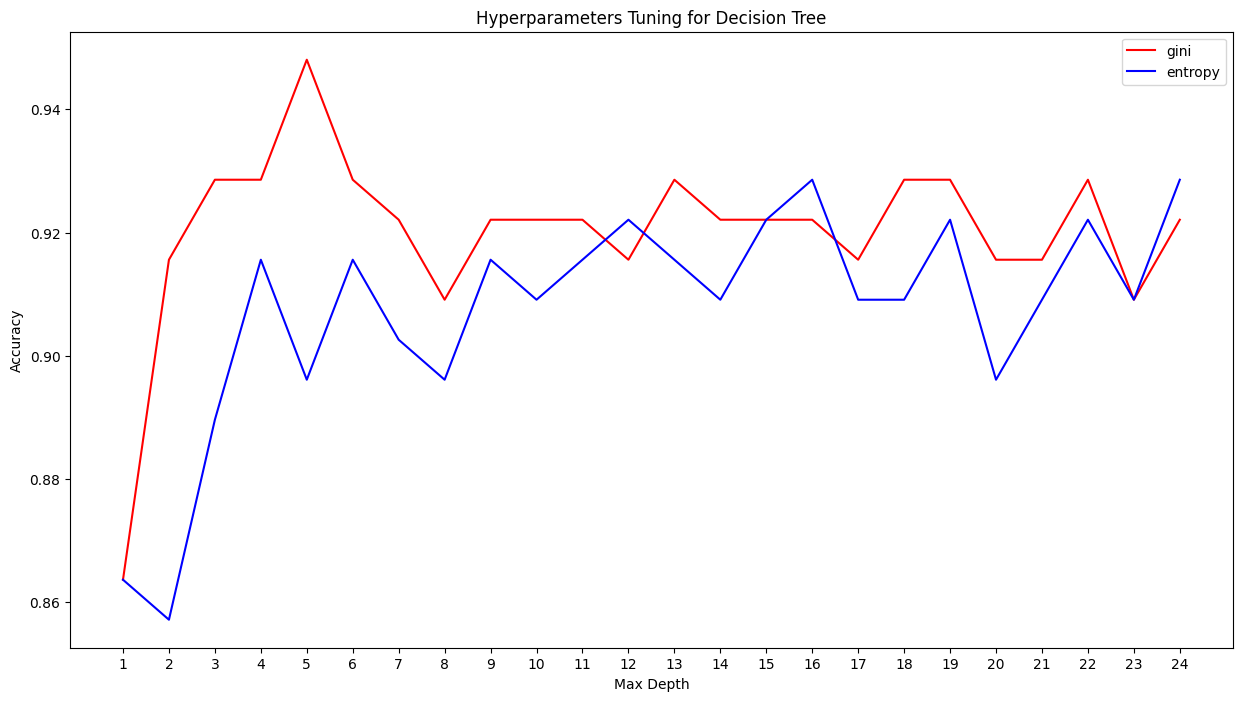

In [183]:
#Visualising Data Frame 
fig = plt.figure(figsize = (15,8))
plt.plot("max_depth", "acc_gini", data = df, label = "gini", color = "red")
plt.plot("max_depth", "acc_entropy", data = df, label = "entropy", color = "blue")

plt.title("Hyperparameters Tuning for Decision Tree")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.xticks([j for j in range(1,25)])
plt.legend()
plt.show()

In [184]:
if acc_gini[-1] <= acc_entropy[-1]:
  Criterion = "gini"
else :
  Criterion = "entropy"
for i in range(1 , 25):
  if acc_gini[-i] == acc_entropy[-i]:
    max_depth = 25-i
    break

In [185]:
DT_model = DecisionTreeClassifier(criterion = Criterion, max_depth = max_depth)
DT_model.fit(train_smote.iloc[:,:-1], train_smote.iloc[:,[-1]])

DecisionTreeClassifier(max_depth=23)

In [186]:
train_smote.iloc[:,:-1].columns

Index(['radius_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'symmetry_mean', 'radius_se', 'perimeter_se', 'area_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'radius_worst',
       'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst'],
      dtype='object')

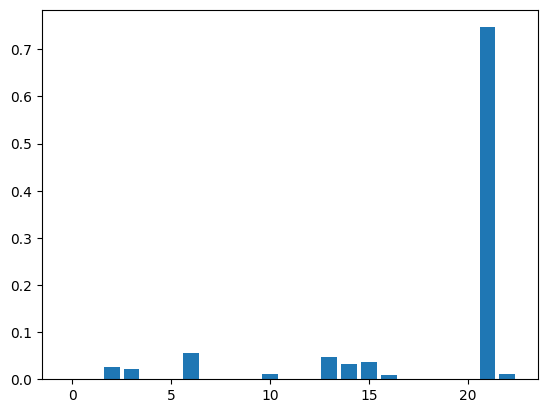

In [187]:
# Embeded نمایش فیچرهای انتخاب شده به روش 
importance = DT_model.feature_importances_

plt.bar([i for i in range(len(importance))], importance)
plt.show()

In [188]:
# نمایش درخت
import six
import sys
sys.modules["sklearn.externals.six"] = six

In [189]:
from sklearn.externals.six import StringIO            #show leafs
import pydotplus                                      #illustrate texts on leafs and trees
from sklearn.tree import export_graphviz              #show trees
from IPython.display import Image

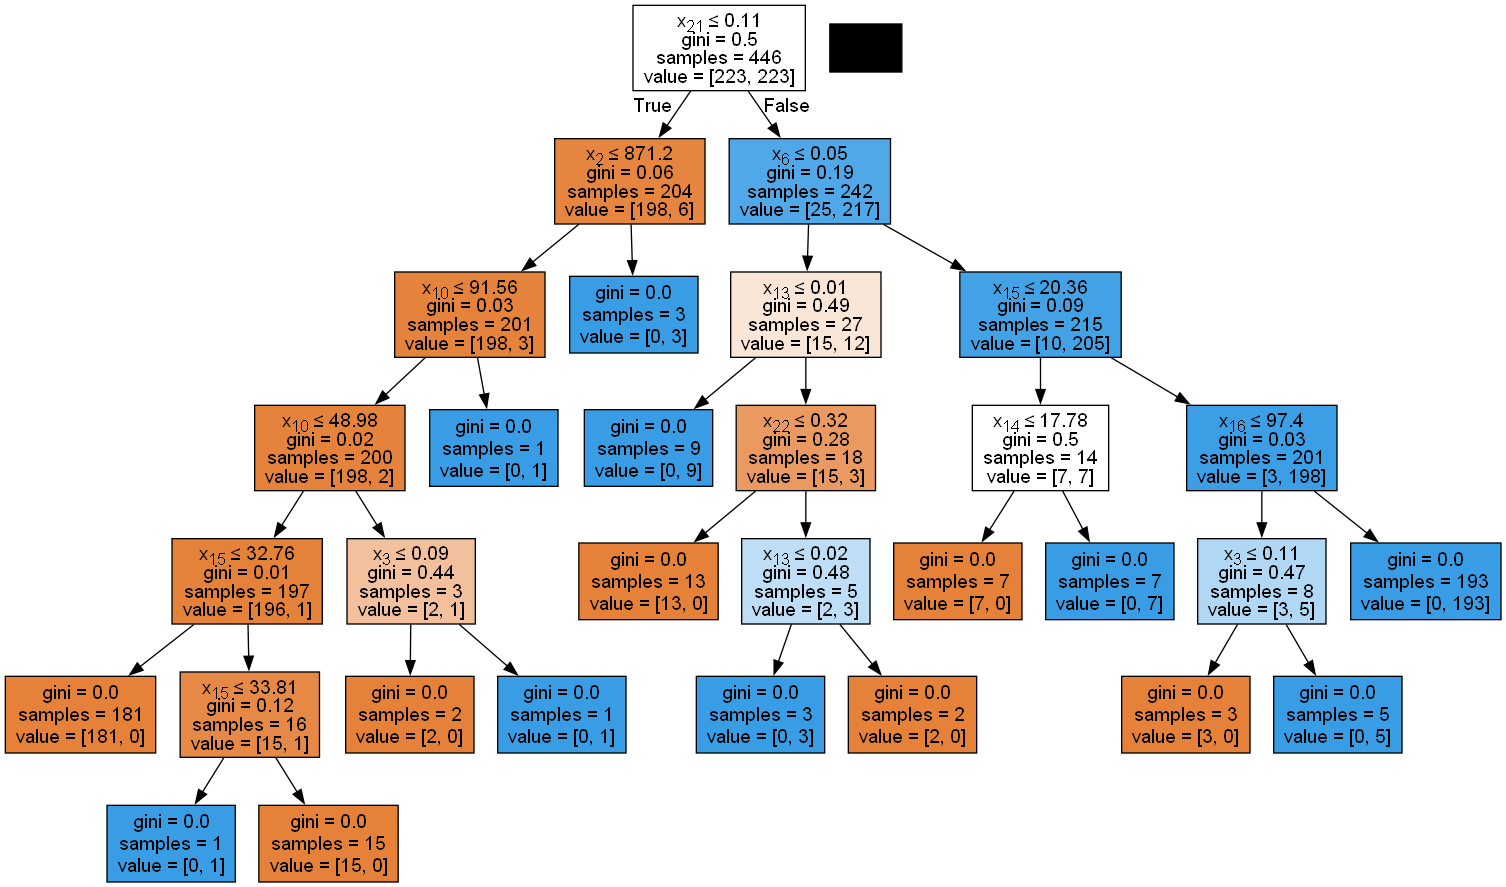

In [190]:
dot_data = StringIO()
export_graphviz(DT_model, out_file = dot_data, filled = True,special_characters = True, precision = 2)
# precision = 2 : for binary target
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [191]:
# Predict Validation and test data
y_dt_pred = DT_model.predict(test_data_fs.iloc[:,:-1])
y_dt_valid = DT_model.predict(valid_data_fs.iloc[:,:-1])
y_dt_pred

array(['M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'B', 'M',
       'M', 'M', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M',
       'M', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'B'],
      dtype=object)

In [192]:
#DT_evaluation
def dt_evaluation():
    cm=np.array(confusion_matrix(y_dt_pred, test_data_fs.iloc[:,[-1]] ))

    confusion = pd.DataFrame(cm, index=["is_canacer","is_healthy"],columns=["predicted_cancer","predicted _healthy"])
    
    cr = classification_report(y_dt_pred,test_data_fs.iloc[:,[-1]] )
    ac_valid=accuracy_score(y_dt_valid, valid_data_fs.iloc[:,[-1]])
    
   
    return confusion,ac_valid,print(cr) 
cr,ac_valid,confusion=dt_evaluation()
cr,ac_valid, confusion

              precision    recall  f1-score   support

           B       0.89      0.97      0.92        88
           M       0.95      0.83      0.89        66

    accuracy                           0.91       154
   macro avg       0.92      0.90      0.91       154
weighted avg       0.91      0.91      0.91       154



(            predicted_cancer  predicted _healthy
 is_canacer                85                   3
 is_healthy                11                  55,
 0.9122807017543859,
 None)

## Random Forest

In [193]:
# Grid Search hyperparameters for RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold


grid = { 
    'n_estimators': range(50,300,50),
    'criterion' : ["gini", "entropy"],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : range(1,31),
    'criterion' :['gini', 'entropy']   
}

cv = RepeatedKFold(n_splits= 10, n_repeats = 3)
model = RandomForestClassifier()
rf_cv = GridSearchCV(estimator=model, param_grid=grid , cv = cv , n_jobs = -1)
rf_cv.fit(train_smote.iloc[:,:-1], np.ravel(train_smote.iloc[:,[-1]]))
rf_cv.best_params_


{'criterion': 'gini',
 'max_depth': 16,
 'max_features': 'log2',
 'n_estimators': 250}

In [194]:
RF_model = RandomForestClassifier(n_estimators = rf_cv.best_params_['n_estimators'] ,
                                  criterion = rf_cv.best_params_['criterion'],
                                  max_depth = rf_cv.best_params_['max_depth'])
RF_model.fit(train_data_fs.iloc[:,:-1], np.ravel(train_data_fs.iloc[:,[-1]]))

RandomForestClassifier(max_depth=16, n_estimators=250)

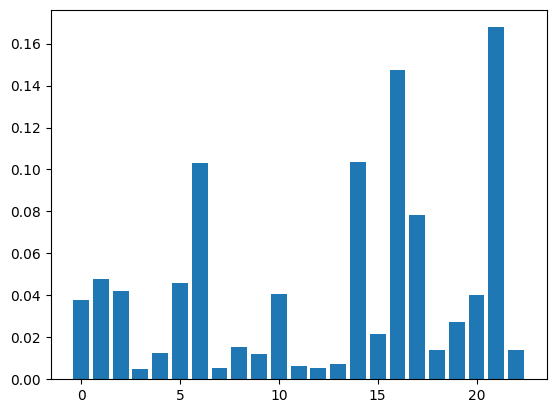

In [195]:
importance = RF_model.feature_importances_

plt.bar([i for i in range(len(importance))], importance)
plt.show()

In [196]:
# Predict Validation and test data
y_rf_pred = RF_model.predict(test_data_fs.iloc[:,:-1])
y_rf_valid = RF_model.predict(valid_data_fs.iloc[:,:-1])

In [197]:
#RF_evaluation
def rf_evaluation():
    cm=np.array(confusion_matrix(y_rf_pred, test_data_fs.iloc[:,[-1]] ))

    confusion = pd.DataFrame(cm, index=["is_canacer","is_healthy"],columns=["predicted_cancer","predicted _healthy"])
    
    cr = classification_report(y_rf_pred,test_data_fs.iloc[:,[-1]] )
    ac_valid=accuracy_score(y_rf_valid, valid_data_fs.iloc[:,[-1]])
    
   
    return confusion,ac_valid, print(cr) 
cr,ac_valid,confusion= rf_evaluation()
cr,ac_valid, confusion

              precision    recall  f1-score   support

           B       0.97      0.98      0.97        95
           M       0.97      0.95      0.96        59

    accuracy                           0.97       154
   macro avg       0.97      0.96      0.97       154
weighted avg       0.97      0.97      0.97       154



(            predicted_cancer  predicted _healthy
 is_canacer                93                   2
 is_healthy                 3                  56,
 0.9473684210526315,
 None)